# Model Testing

Imports:

In [1]:
import os
import pandas as pd
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as skmetric
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from funcsigs import signature

Get the current working directory:

In [2]:
def get_parent_dir(directory):
    import os
    return os.path.dirname(directory)

current_dirs_parent = get_parent_dir(os.getcwd())
dataraw_dir=current_dirs_parent+"/01.Data/Raw/"
preproc_dir=current_dirs_parent+"/01.Data/Preprocessing/"

Load preprocessed data:

In [3]:
train_b=pd.read_csv(preproc_dir+"train_b_preproc1.csv")
test_b=pd.read_csv(preproc_dir+"test_b_preproc1.csv")

In [4]:
cols=train_b.columns
selcols=[a for a in cols if a.startswith("x")]

In [6]:
X_train=train_b[train_b.columns.intersection(selcols)].copy()
X_train.fillna(0, inplace=True) 
X_train.replace(to_replace=np.inf, value=0, inplace=True)
#X_train.replace(to_replace=-np.inf, value=0, inplace=True)

X_test=test_b[test_b.columns.intersection(selcols)].copy()
X_test.fillna(0, inplace=True) 
X_test.replace(to_replace=np.inf, value=0, inplace=True)
#X_test.replace(to_replace=-np.inf, value=0, inplace=True)

y_train=train_b["y_lead2"].copy()
y_test=test_b["y_lead2"].copy()

Train the logistic regression model:

In [7]:
LR1=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR1.fit(X_train,y_train)

C:\Users\jchas\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [8]:
y_pred=LR1.predict(X_test)

In [9]:
min(y_pred), max(y_pred)

(0, 1)

In [10]:
skmetric.f1_score(y_test,y_pred)

0.008771929824561403

In [11]:
skmetric.precision_score(y_test,y_pred)

0.004608294930875576

In [12]:
skmetric.recall_score(y_test,y_pred)

0.09090909090909091

Precision-Recall plot

In [13]:
y_prob=LR1.predict_proba(X_test)

In [14]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob[:,1],pos_label=1)

(0.0, 1.0)

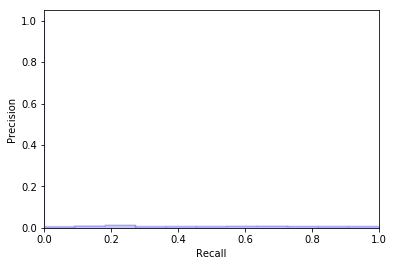

In [15]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [16]:
feature_importance = abs(LR1.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

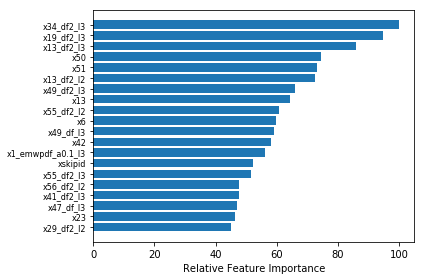

In [17]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

Scaling the variables:

In [18]:
scaler= StandardScaler().fit(X_train)
X_train_sc=scaler.transform(X_train)
X_test_sc=scaler.transform(X_test)

Additional LR:

In [19]:
LR2=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR2.fit(X_train_sc,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
y_pred_sc=LR2.predict(X_test_sc)

In [21]:
min(y_pred_sc), max(y_pred_sc)

(0, 1)

In [22]:
skmetric.f1_score(y_test,y_pred_sc)

0.01694915254237288

In [23]:
skmetric.precision_score(y_test,y_pred_sc)

0.008888888888888889

In [24]:
skmetric.recall_score(y_test,y_pred_sc)

0.18181818181818182

Precision-Recall Plot

In [25]:
y_prob_sc=LR2.predict_proba(X_test_sc)

In [26]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_sc[:,1],pos_label=1)

(0.0, 1.0)

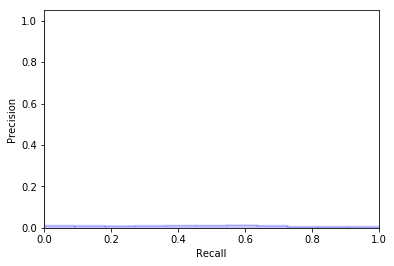

In [27]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [28]:
feature_importance = abs(LR2.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

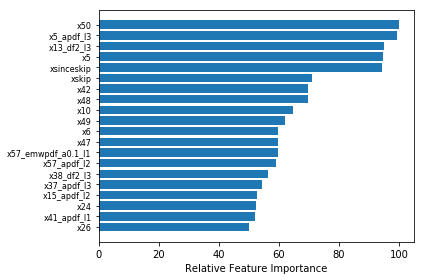

In [29]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

Testing only original features:

In [30]:
xoriginal=selcols[:61]

In [31]:
X_train_orig=train_b[train_b.columns.intersection(xoriginal)].copy()
X_train_orig.fillna(0, inplace=True) 
X_train_orig.replace(to_replace=np.inf, value=0, inplace=True)
#X_train.replace(to_replace=-np.inf, value=0, inplace=True)

X_test_orig=test_b[test_b.columns.intersection(xoriginal)].copy()
X_test_orig.fillna(0, inplace=True) 
X_test_orig.replace(to_replace=np.inf, value=0, inplace=True)
#X_test.replace(to_replace=-np.inf, value=0, inplace=True)

In [32]:
LR3=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR3.fit(X_train_orig,y_train)

C:\Users\jchas\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [33]:
y_pred_orig=LR3.predict(X_test_orig)

In [34]:
min(y_pred_orig), max(y_pred_orig)

(0, 1)

In [35]:
skmetric.f1_score(y_test,y_pred_orig)

0.010309278350515464

In [36]:
skmetric.precision_score(y_test,y_pred_orig)

0.005253940455341506

In [37]:
skmetric.recall_score(y_test,y_pred_orig)

0.2727272727272727

In [38]:
y_prob_orig=LR3.predict_proba(X_test_orig)

In [39]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_orig[:,1],pos_label=1)

(0.0, 1.0)

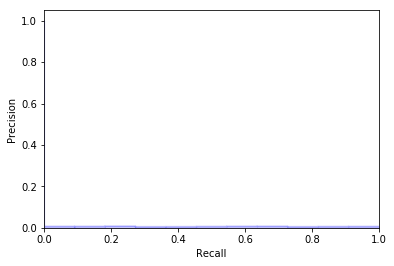

In [40]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [41]:
feature_importance = abs(LR3.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

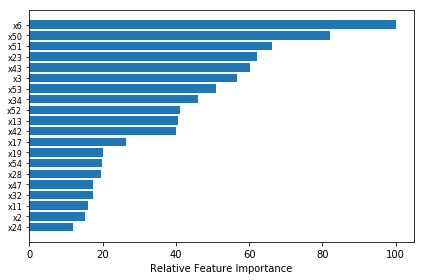

In [42]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

Scaling original features:

In [43]:
scaler_orig= StandardScaler().fit(X_train_orig)
X_train_orig_sc=scaler_orig.transform(X_train_orig)
X_test_orig_sc=scaler_orig.transform(X_test_orig)

In [44]:
LR4=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR4.fit(X_train_orig_sc,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
y_pred_orig_sc=LR4.predict(X_test_orig_sc)

In [46]:
min(y_pred_orig_sc), max(y_pred_orig_sc)

(0, 1)

In [47]:
skmetric.f1_score(y_test,y_pred_orig_sc)

0.013745704467353952

In [48]:
skmetric.precision_score(y_test,y_pred_orig_sc)

0.007142857142857143

In [49]:
skmetric.recall_score(y_test,y_pred_orig_sc)

0.18181818181818182

In [50]:
y_prob_orig_sc=LR4.predict_proba(X_test_orig_sc)

In [51]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_orig_sc[:,1],pos_label=1)

(0.0, 1.0)

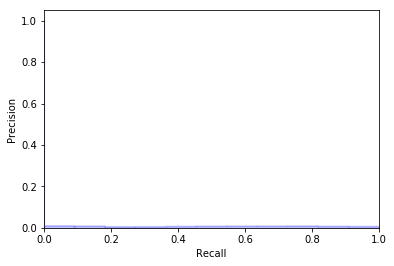

In [52]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [53]:
feature_importance = abs(LR4.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

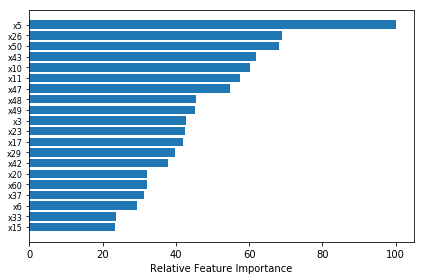

In [54]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

Testing only the derived features:

In [55]:
xderived=selcols[61:]

In [56]:
X_train_derived=train_b[train_b.columns.intersection(xderived)].copy()
X_train_derived.fillna(0, inplace=True) 
X_train_derived.replace(to_replace=np.inf, value=0, inplace=True)
#X_train.replace(to_replace=-np.inf, value=0, inplace=True)

X_test_derived=test_b[test_b.columns.intersection(xderived)].copy()
X_test_derived.fillna(0, inplace=True) 
X_test_derived.replace(to_replace=np.inf, value=0, inplace=True)
#X_test.replace(to_replace=-np.inf, value=0, inplace=True)

In [57]:
LR5=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR5.fit(X_train_derived,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
y_pred_derived=LR5.predict(X_test_derived)

In [59]:
min(y_pred_derived), max(y_pred_derived)

(0, 1)

In [60]:
skmetric.f1_score(y_test,y_pred_derived)

0.011513157894736843

In [61]:
skmetric.precision_score(y_test,y_pred_derived)

0.005809128630705394

In [62]:
skmetric.recall_score(y_test,y_pred_derived)

0.6363636363636364

In [63]:
y_prob_derived=LR5.predict_proba(X_test_derived)

In [64]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_derived[:,1],pos_label=1)

(0.0, 1.0)

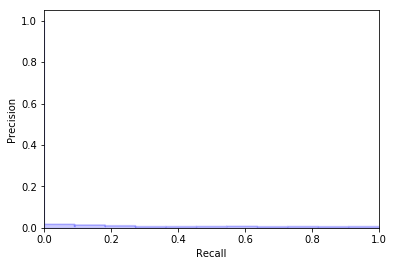

In [65]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [66]:
feature_importance = abs(LR5.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

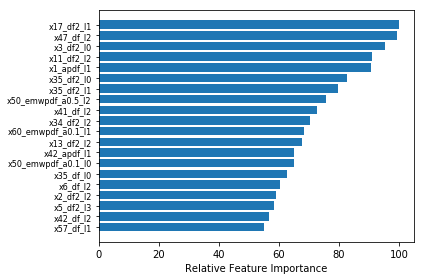

In [67]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()

Scaling derived features:

In [68]:
scaler_derived= StandardScaler().fit(X_train_derived)
X_train_derived_sc=scaler_derived.transform(X_train_derived)
X_test_derived_sc=scaler_derived.transform(X_test_derived)

In [69]:
LR6=LogisticRegression(class_weight ="balanced", 
                       max_iter = 10000, 
                       penalty = "l1", 
                       solver = "saga",
                       n_jobs=4,
                       random_state=42, 
                       C = 0.01)

LR6.fit(X_train_derived_sc,y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=10000, multi_class='warn', n_jobs=4, penalty='l1',
                   random_state=42, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
y_pred_derived_sc=LR6.predict(X_test_derived_sc)

In [71]:
min(y_pred_derived_sc), max(y_pred_derived_sc)

(0, 1)

In [72]:
skmetric.f1_score(y_test,y_pred_derived_sc)

0.021276595744680847

In [73]:
skmetric.precision_score(y_test,y_pred_derived_sc)

0.010958904109589041

In [74]:
skmetric.recall_score(y_test,y_pred_derived_sc)

0.36363636363636365

In [75]:
y_prob_derived_sc=LR6.predict_proba(X_test_derived_sc)

In [76]:
precision, recall, _=skmetric.precision_recall_curve(y_true=y_test,probas_pred=y_prob_derived_sc[:,1],pos_label=1)

(0.0, 1.0)

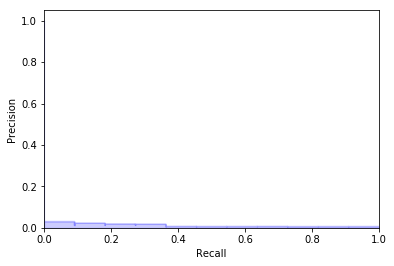

In [77]:
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

In [78]:
feature_importance = abs(LR6.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)[len(feature_importance)-20:len(feature_importance)]
pos = np.arange(sorted_idx.shape[0]) + .5

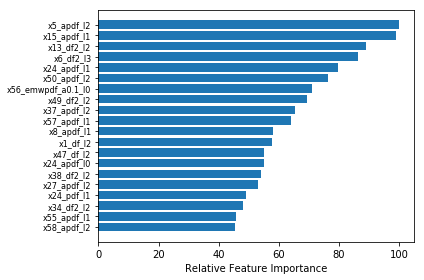

In [79]:
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')
plt.tight_layout()   
plt.show()